## Lesson 15 
# Keras and Tensorflow

In [1]:
# For Google Colab add the following before importing
#!pip install keras-cv
#!pip install --upgrade tensorflow


# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

# Also you should comment all the following libraries for colab
from tensorflow.keras.layers import Normalization, Dense, InputLayer
from tensorflow.keras.losses import MeanSquaredError, MeanAbsoluteError, Huber
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam, SGD

# and uncomment the following:
# Import libraries

#from keras.layers import Normalization, Dense, InputLayer
#from keras.losses import MeanSquaredError, MeanAbsoluteError, Huber
#from keras.metrics import RootMeanSquaredError
#from keras.optimizers import Adam, SGD


In [2]:
# Import the Dataset

filepath = "./assets/secondhand_car.csv"
data = pd.read_csv(filepath)
data.head(4)

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5


In [3]:
data.shape

(1000, 12)

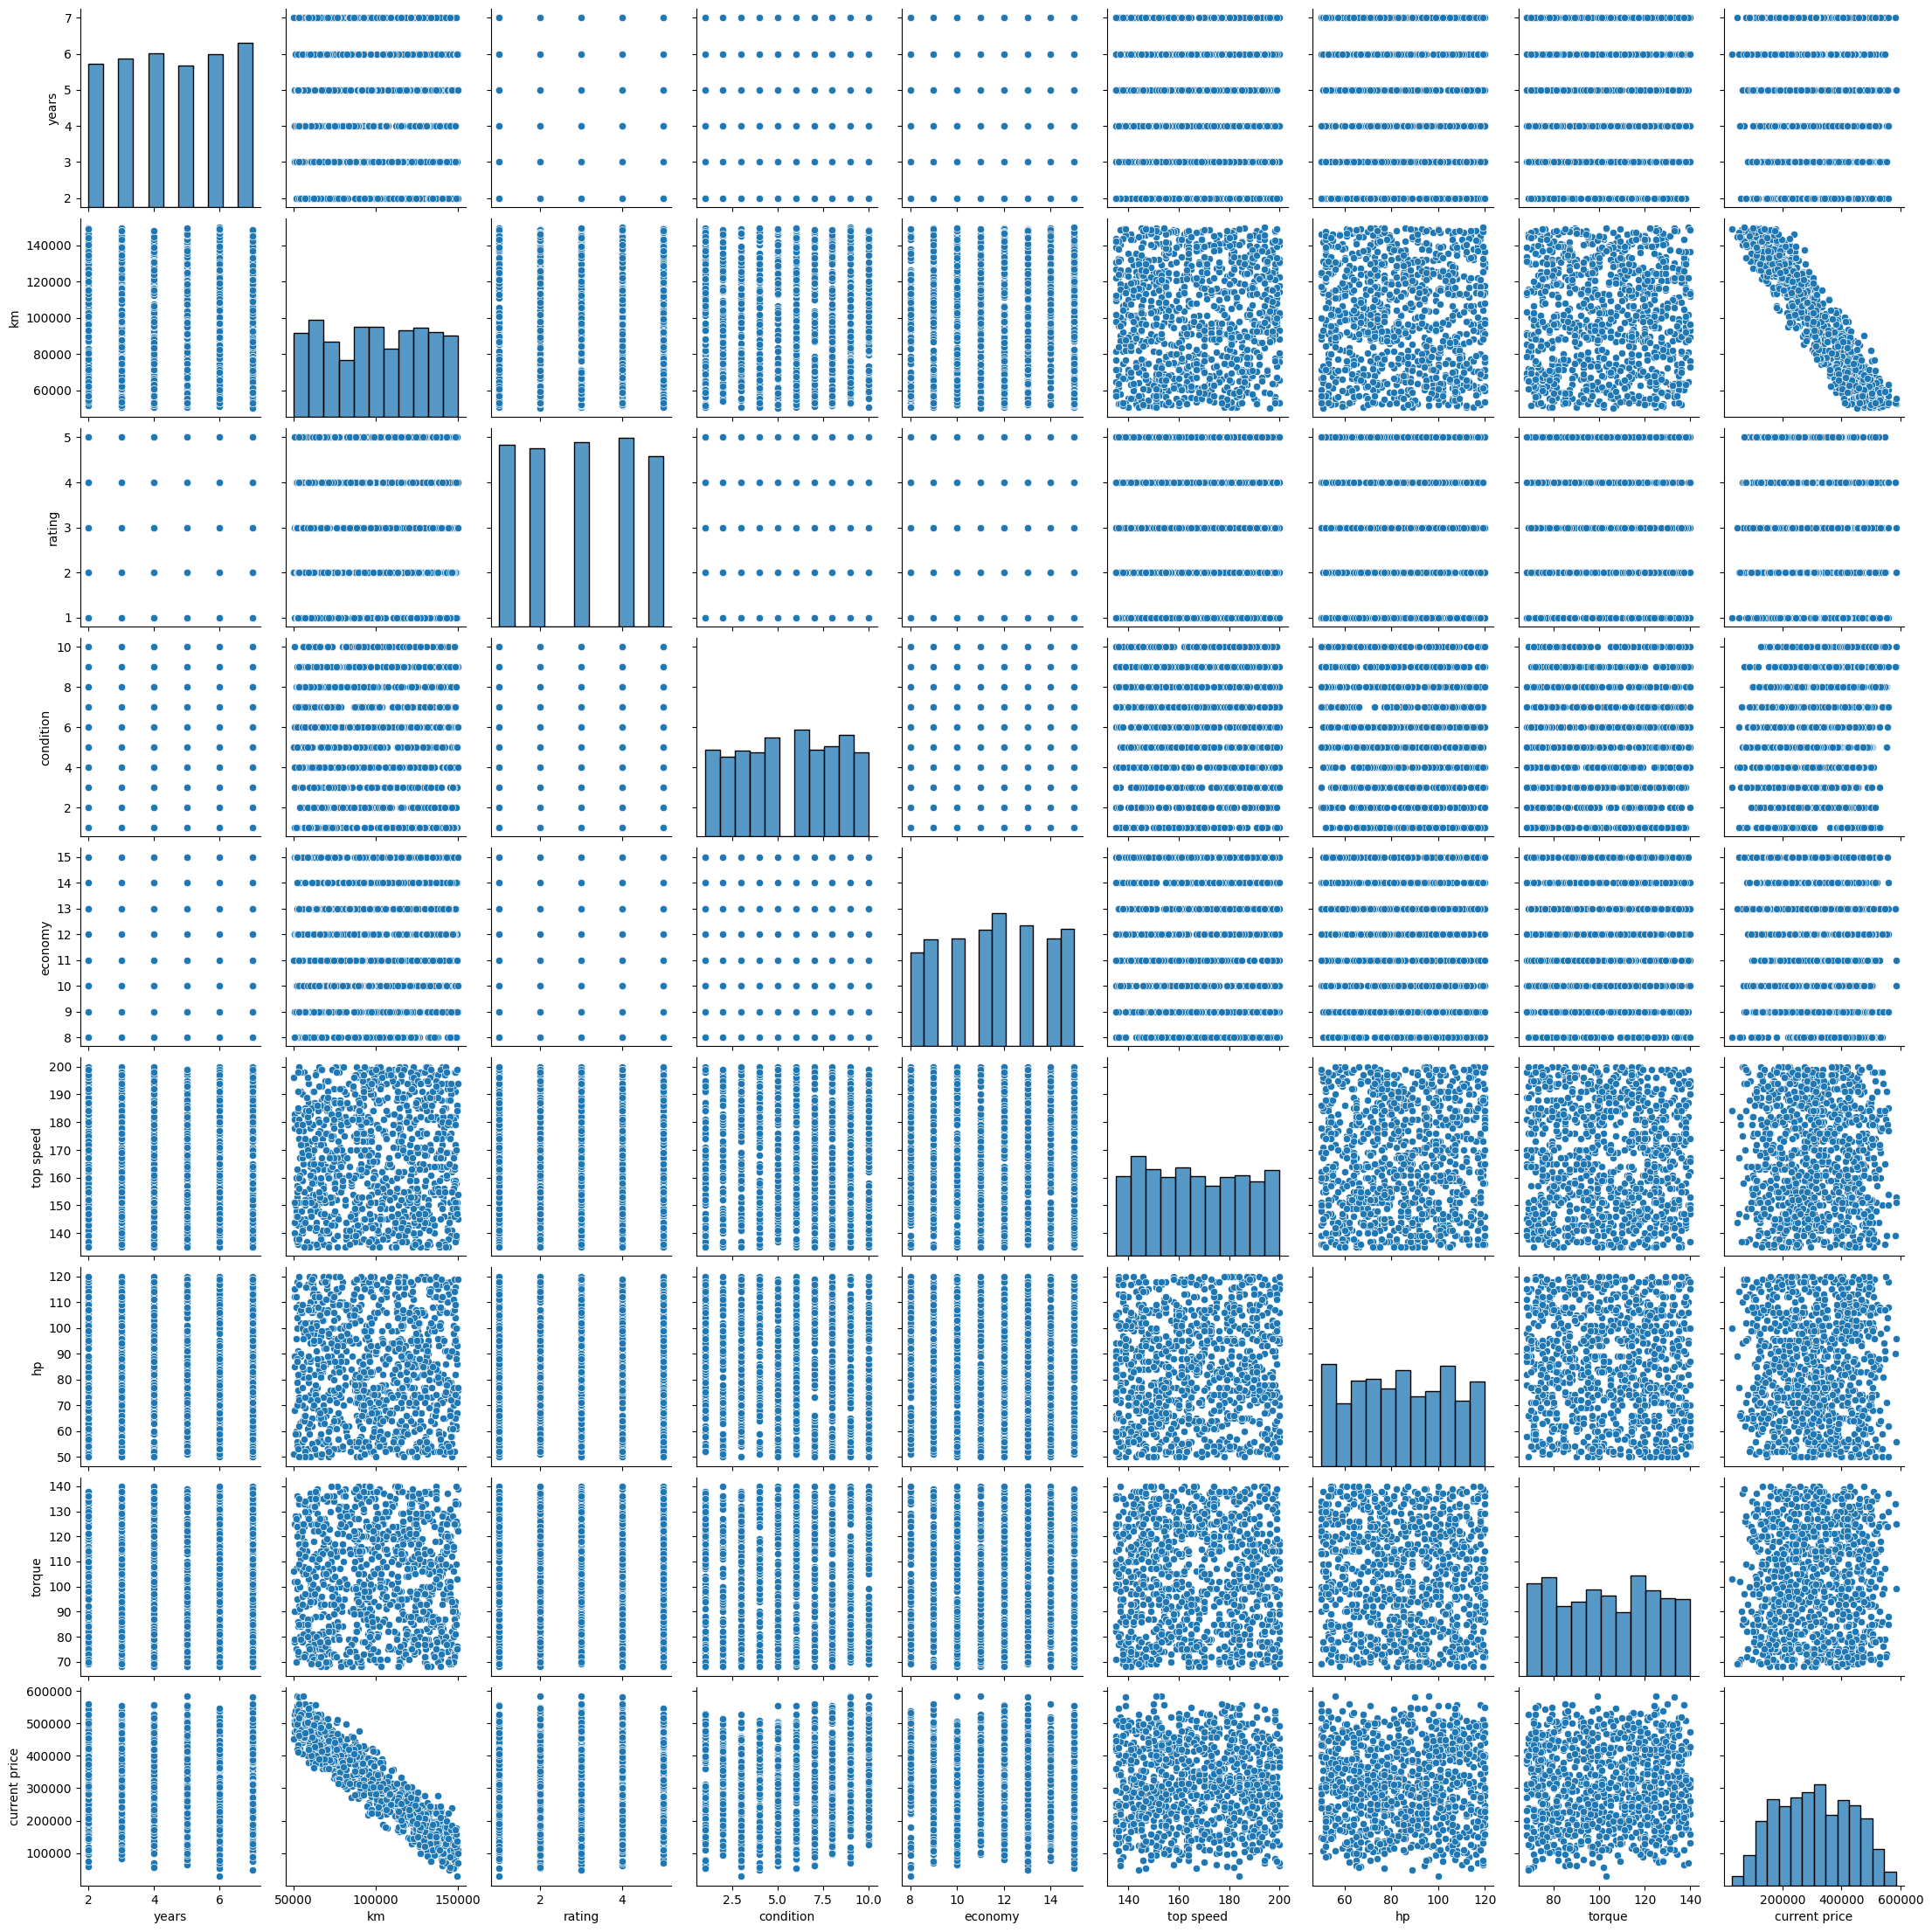

In [4]:
# Basic Visualization for dataset

sns.pairplot(data[['years', 'km', 'rating', 'condition', 'economy', 'top speed', 'hp', 'torque', 'current price']])

In [5]:
# Shuffling the data and assigning the X and y

shuffled_data = tf.random.shuffle(data)
X = shuffled_data[:, 3:-1]
y = tf.expand_dims(shuffled_data[:,-1], -1)
print(X.shape, y.shape)

(1000, 8) (1000, 1)


In [6]:
data.head(4)

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5


In [7]:
# Assigning the ratio

TRAIN_RATIO = 0.8
VAL_RATIO = 0.1
TEST_RATIO = 0.1
DATASET_SIZE = len(X)
print(DATASET_SIZE)

1000


In [8]:
# Assigning Data Training

X_train = X[:int(DATASET_SIZE*TRAIN_RATIO)]
y_train = y[:int(DATASET_SIZE*TRAIN_RATIO)]
print(X_train.shape, y_train.shape)

(800, 8) (800, 1)


In [9]:
# Assigning Data Validation

X_val = X[int(DATASET_SIZE*TRAIN_RATIO):int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO))]
y_val = y[int(DATASET_SIZE*TRAIN_RATIO):int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO))]
print(X_val.shape, y_val.shape)

(100, 8) (100, 1)


In [10]:
# Assigning Data Testing

X_test = X[int(DATASET_SIZE*(TRAIN_RATIO+TEST_RATIO)):]
y_test = y[int(DATASET_SIZE*(TRAIN_RATIO+TEST_RATIO)):]
print(X_test.shape, y_test.shape)

(100, 8) (100, 1)


In [11]:
# Assigning the size

BUFFER_SIZE = 16
BATCH_SIZE = 64

In [12]:
# Train for dataset

train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size = BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [13]:
# Validation for dataset

val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val))
val_dataset = val_dataset.shuffle(buffer_size = BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [14]:
# Test for dataset

test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
test_dataset = test_dataset.shuffle(buffer_size = BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [15]:
for i , j in train_dataset:
    print(i.shape, j.shape)
    break

(64, 8) (64, 1)


In [16]:
# Normalization

normalizer = Normalization()
normalizer.adapt(X_train)
normalizer(X_train)[:5]

<tf.Tensor: shape=(5, 8), dtype=float32, numpy=
array([[ 1.4195482 ,  0.8952677 , -0.72190756,  1.2234952 ,  1.0538839 ,
        -1.0212511 ,  0.87047464,  1.5625417 ],
       [ 0.2625044 , -0.15416215, -0.72190756,  1.2234952 ,  1.5030619 ,
         1.4280678 ,  0.8214338 , -0.37461543],
       [-1.4730613 ,  0.36265266, -0.00714759,  0.16035669,  0.6047058 ,
         1.4790953 , -1.5325258 , -1.366818  ],
       [ 0.2625044 , -0.7769849 , -1.4366676 ,  1.2234952 ,  1.5030619 ,
         0.20340838,  0.47814804,  1.326303  ],
       [ 0.8410263 , -0.27262932,  1.4223723 ,  1.5778748 ,  0.6047058 ,
         1.5301228 , -0.7969134 ,  1.2790554 ]], dtype=float32)>

In [17]:
# Begin Training Model

model = tf.keras.Sequential([
    InputLayer(shape = (8,)),
    normalizer,
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(1),
], name='car')
model.summary()

Model: "car"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ normalization (Normalization)        │ (None, 8)                   │              17 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,834 (198.57 KB)

 Trainable params: 50,817 (198.50 KB)

 Non-trainable params: 17 (72.00 B)

In [18]:
# Ploting
!pip install graphviz
tf.keras.utils.plot_model(model, to_file="./output/model.png", show_shapes=True)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


In [19]:
# Compiling

model.compile(
    optimizer = Adam(learning_rate = 0.1),
    loss = MeanAbsoluteError(),
    metrics = [RootMeanSquaredError()]
)

In [20]:
# Fit the model

history = model.fit(
    train_dataset,
    validation_data = val_dataset,
    epochs = 100,
    verbose = 1
)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 192800.2969 - root_mean_squared_error: 235219.9688 - val_loss: 116281.8281 - val_root_mean_squared_error: 150815.7188
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 91572.6172 - root_mean_squared_error: 116747.5234 - val_loss: 78702.6250 - val_root_mean_squared_error: 94989.3750
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 75149.7188 - root_mean_squared_error: 91626.5781 - val_loss: 42948.3906 - val_root_mean_squared_error: 54637.2383
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 61676.3398 - root_mean_squared_error: 78882.2188 - val_loss: 41162.3906 - val_root_mean_squared_error: 51506.6914
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 50456.2891 - root_mean_squared_error: 63682.6250 - val_loss: 46657.9688 - val_root_mean_squared_error: 57650.3086
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 43095.2852 - root_mean_squared_error: 53897.2266 - val_loss: 53961.

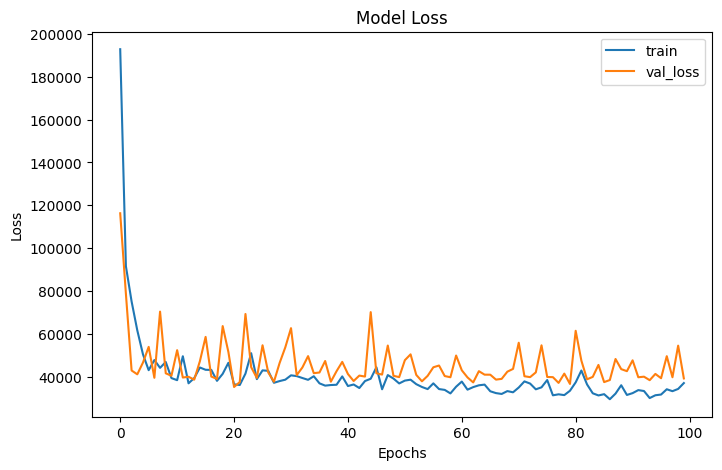

In [21]:
# Plot the loss

plt.figure(figsize = (8,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel('Epochs')
plt.legend(['train', 'val_loss'])
plt.show()

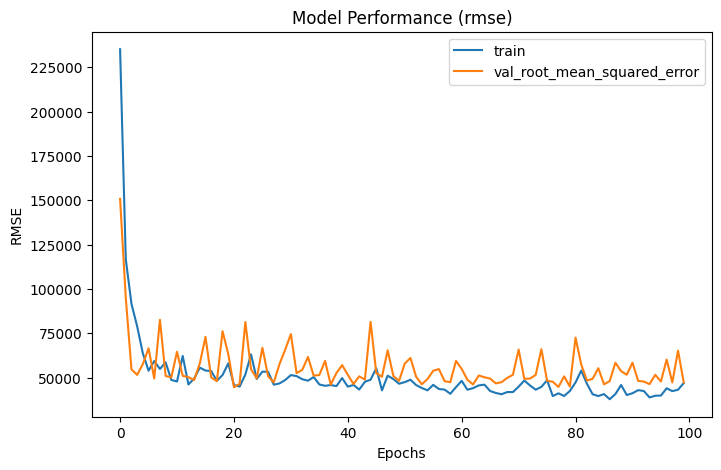

In [22]:
# Plot the Root Mean Squared Error

plt.figure(figsize = (8,5))
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title("Model Performance (rmse)")
plt.ylabel("RMSE")
plt.xlabel('Epochs')
plt.legend(['train', 'val_root_mean_squared_error'])
plt.show()

In [23]:
# Model Evaluation

model.evaluate(X_test, y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 42649.4844 - root_mean_squared_error: 51807.9023 


[42649.484375, 51807.90234375]

In [24]:
X_test.shape

TensorShape([100, 8])

In [25]:
# Evaluate Valuation
model.evaluate(val_dataset)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 39243.6836 - root_mean_squared_error: 47293.9688 


[39243.68359375, 47293.96875]

In [26]:
# Evaluate Test
model.evaluate(test_dataset)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 42649.4844 - root_mean_squared_error: 51807.9023


[42649.484375, 51807.90234375]

In [27]:
X_test[0]

<tf.Tensor: shape=(8,), dtype=float64, numpy=
array([3.000e+00, 1.481e+05, 5.000e+00, 6.000e+00, 1.300e+01, 1.510e+02,
       1.090e+02, 1.330e+02])>

In [28]:
# Predicting the model
model.predict(tf.expand_dims(X_test[0], axis=0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step


array([[94004.08]], dtype=float32)

In [29]:
y_test[0]

<tf.Tensor: shape=(1,), dtype=float64, numpy=array([151080.5])>

In [30]:
y_true = y_test[:,0].numpy()
print(y_true)

[151080.5 261732.  276960.5 144124.  229110.  407127.5 328698.  289117.
 159647.  169471.  163814.  483708.5 348535.  432159.5 435007.5 382461.5
 421655.5 463054.5 304818.  148734.5 153991.   98311.5 186356.5 474281.5
 476955.5 166571.  339335.5 186308.  549406.  360410.  295013.   69231.5
 269532.5 206999.5 275045.5 529318.5 156825.5 339888.  452931.  258692.
 232826.5 275781.  245796.  235843.  458139.  503606.5 400257.  426479.5
 438032.5 315925.  351704.5  93713.  246242.  379566.  433615.5 332812.
 344339.5 426796.5 288926.  342427.  357823.  584267.5 355175.  153381.5
 235251.5 253037.  120583.5 210777.5 179711.5 304923.5 545171.  506854.
 231291.5 220518.  114860.  151474.  341076.  311973.  398023.  136824.5
 253387.   74398.  322951.5 207480.5 274172.  275385.  198738.  394208.5
 237204.  360647.5 500903.  122843.5 513722.5 399672.  264084.5 429669.
 269326.  499647.  512492.  381960. ]


In [31]:
y_pred = model(X_test)[:,0].numpy()
print(y_pred)

[ 94004.08  282746.47  222399.3   142975.55  165447.8   476051.47
 332570.16  313919.72  192944.77  121778.22  143632.94  426422.62
 329437.66  337979.66  409188.1   399023.22  333377.34  471642.97
 337772.    126847.28  181432.14   37349.43  141101.58  504339.78
 364015.12   94709.61  420639.6   187329.95  514638.6   311198.9
 280499.03  133338.98  230504.84  219340.5   217961.47  554860.25
 190543.06  322757.56  424934.9   200304.17  316660.53  140348.39
 182419.02  187071.58  487707.5   376007.94  468145.9   403350.78
 418827.34  294508.28  266200.12  106715.875 230548.14  284358.22
 424235.97  350949.34  301522.03  389440.22  286036.28  307339.75
 334742.16  541251.6   391886.84  197499.64  167452.73  241168.17
 139982.36  216403.48  268160.4   272011.5   469642.6   456978.3
 270486.03  260684.73  144251.11  150445.48  348810.84  318826.66
 455740.06   91786.58  244756.33  146243.6   319673.88  225339.95
 231229.55  285413.38  191236.27  309337.28  311468.94  409859.4
 459677.53  1

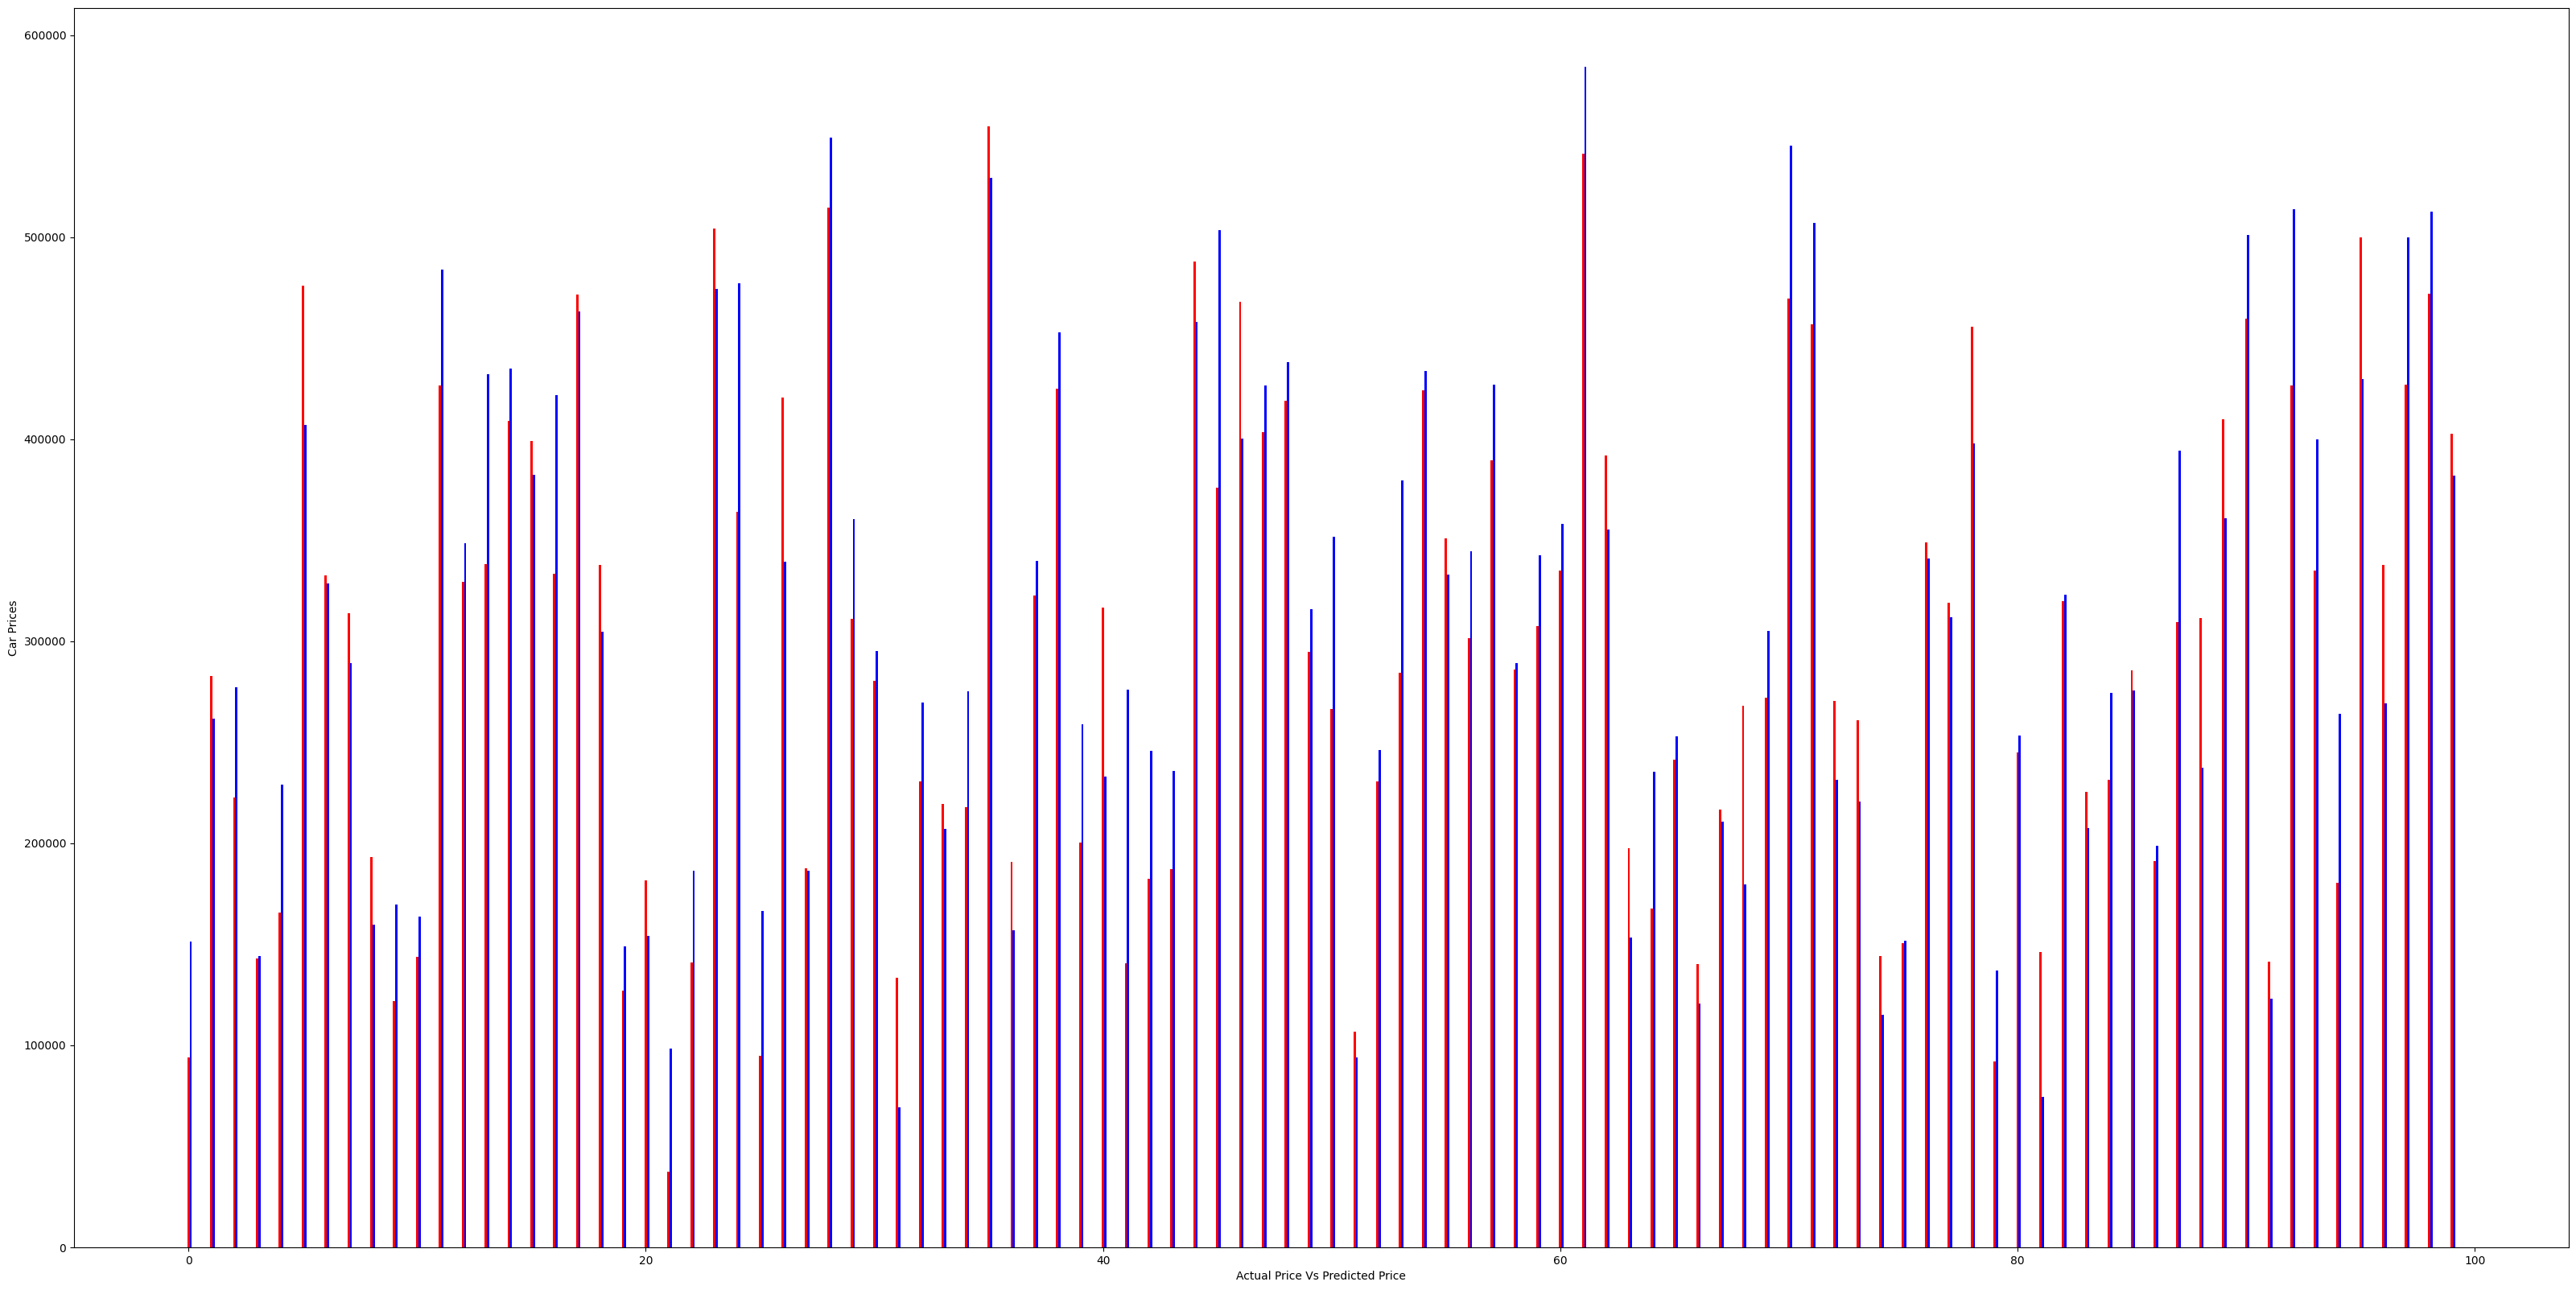

In [32]:
# Plot the car price prediction

plt.figure(figsize = (40,20))
width = 0.1
plt.bar(tf.range(100).numpy(), y_pred, width, label="Model Prediction", color="red")
plt.bar(tf.range(100).numpy()+width , y_true, width ,  label="Actual Price", color="blue")
plt.xlabel("Actual Price Vs Predicted Price")
plt.ylabel("Car Prices")
plt.show()
